In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df=pd.read_csv("C:/Users/srina/Desktop/csv files/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
#Creating dummy vairables for ['ShelveLoc','US','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['ShelveLoc','US','Urban'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,1,0
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [5]:
#Creating new cols TaxInc and dividing 'sales' cols on the basis of [2,9,15] for yes and no
df["Sale"] = pd.cut(df["Sales"], bins = [2,9,15], labels = ["No", "Yes"])
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sale
0,9.50,138,73,11,276,120,42,17,0,0,1,1,Yes
1,11.22,111,48,16,260,83,65,10,1,0,1,1,Yes
2,10.06,113,35,10,269,80,59,12,0,1,1,1,Yes
3,7.40,117,100,4,466,97,55,14,0,1,1,1,No
4,4.15,141,64,3,340,128,38,13,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1,Yes
396,6.14,139,23,3,37,120,55,11,0,1,1,0,No
397,7.41,162,26,12,368,159,40,18,0,1,1,1,No
398,5.94,100,79,7,284,95,50,12,0,0,1,1,No


In [6]:
#creating dummies for the sales
df = pd.get_dummies(df,columns = ["Sale"],drop_first=True)
df.head(15)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sale_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1,0
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0
5,10.81,124,113,13,501,72,78,16,0,0,1,0,1
6,6.63,115,105,0,45,108,71,15,0,1,0,1,0
7,11.85,136,81,15,425,120,67,10,1,0,1,1,1
8,6.54,132,110,0,108,124,76,10,0,1,0,0,0
9,4.69,132,113,0,131,124,76,17,0,1,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    int64  
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   ShelveLoc_Good    400 non-null    uint8  
 9   ShelveLoc_Medium  400 non-null    uint8  
 10  US_Yes            400 non-null    uint8  
 11  Urban_Yes         400 non-null    uint8  
 12  Sale_Yes          400 non-null    uint8  
dtypes: float64(1), int64(7), uint8(5)
memory usage: 27.1 KB


In [8]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sale_Yes


In [9]:
df.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Good      0
ShelveLoc_Medium    0
US_Yes              0
Urban_Yes           0
Sale_Yes            0
dtype: int64

In [10]:
#Correlation
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sale_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,0.500510,-0.073999,0.177093,-0.015419,0.741904
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.026386,0.008683,0.016869,0.066594,0.010126
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.012657,-0.051392,0.089601,0.037967,0.137233
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056149,-0.015929,0.684460,0.042035,0.279511
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.007789,-0.040640,0.060564,-0.052025,0.049682
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.045854,-0.006607,0.057861,0.047016,-0.324944
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.022818,0.056613,0.008652,0.028479,-0.174192
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.029188,0.013242,-0.078250,-0.033094,-0.046718
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,1.000000,-0.571396,0.078864,-0.039197,0.442382
ShelveLoc_Medium,-0.073999,0.008683,-0.051392,-0.015929,-0.040640,-0.006607,0.056613,0.013242,-0.571396,1.000000,-0.065656,-0.037391,-0.154490


checking for multicollinearity problem using VIF factor

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [12]:
X = df.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,CompPrice,85.308630
1,Income,6.860377
2,Advertising,4.469242
3,Population,4.420311
4,Price,54.865502
5,Age,11.448012
6,Education,22.898130
7,ShelveLoc_Good,2.673652
8,ShelveLoc_Medium,3.419224
9,US_Yes,5.518990


Droping few columns which have high VIF values. i.e., with high multicollinearity problem.

In [13]:
df1=df.drop('CompPrice',axis=1)

In [14]:
df2=df1.drop('Price',axis=1)

In [15]:
df3=df2.drop('Education',axis=1)

In [16]:
df4=df3.drop('Age',axis=1)

In [17]:
df=df4.drop('Income',axis=1)

converting sales column into category.

In [19]:
df['Sales'] = df['Sales'].astype('category')

In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.head(10)

,Advertising,Population,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes,Sale_Yes
0,0.379310,0.533066,0.0,0.0,1.0,1.0,1.0
1,0.551724,0.501002,1.0,0.0,1.0,1.0,1.0
2,0.344828,0.519038,0.0,1.0,1.0,1.0,1.0
3,0.137931,0.913828,0.0,1.0,1.0,1.0,0.0
4,0.103448,0.661323,0.0,0.0,0.0,1.0,0.0
5,0.448276,0.983968,0.0,0.0,1.0,0.0,1.0
6,0.000000,0.070140,0.0,1.0,0.0,1.0,0.0
7,0.517241,0.831663,1.0,0.0,1.0,1.0,1.0
8,0.000000,0.196393,0.0,1.0,0.0,0.0,0.0
9,0.000000,0.242485,0.0,1.0,1.0,0.0,0.0


In [22]:
# Declaring features & target
X = df_norm.drop(['Sale_Yes'], axis=1)
y = df_norm['Sale_Yes']

In [23]:
X

,Advertising,Population,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,0.379310,0.533066,0.0,0.0,1.0,1.0
1,0.551724,0.501002,1.0,0.0,1.0,1.0
2,0.344828,0.519038,0.0,1.0,1.0,1.0
3,0.137931,0.913828,0.0,1.0,1.0,1.0
4,0.103448,0.661323,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
395,0.586207,0.386774,1.0,0.0,1.0,1.0
396,0.103448,0.054108,0.0,1.0,1.0,0.0
397,0.413793,0.717435,0.0,1.0,1.0,1.0
398,0.241379,0.549098,0.0,0.0,1.0,1.0


In [24]:
y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: Sale_Yes, Length: 400, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
x_train.isnull().sum()

Advertising         0
Population          0
ShelveLoc_Good      0
ShelveLoc_Medium    0
US_Yes              0
Urban_Yes           0
dtype: int64

#### Building Decision Tree Classifier using Entropy Criteria

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

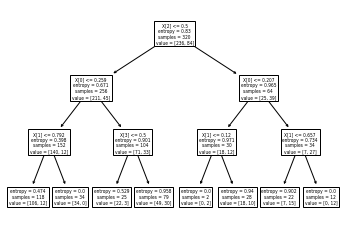

In [29]:
#PLot the decision tree
tree.plot_tree(model);


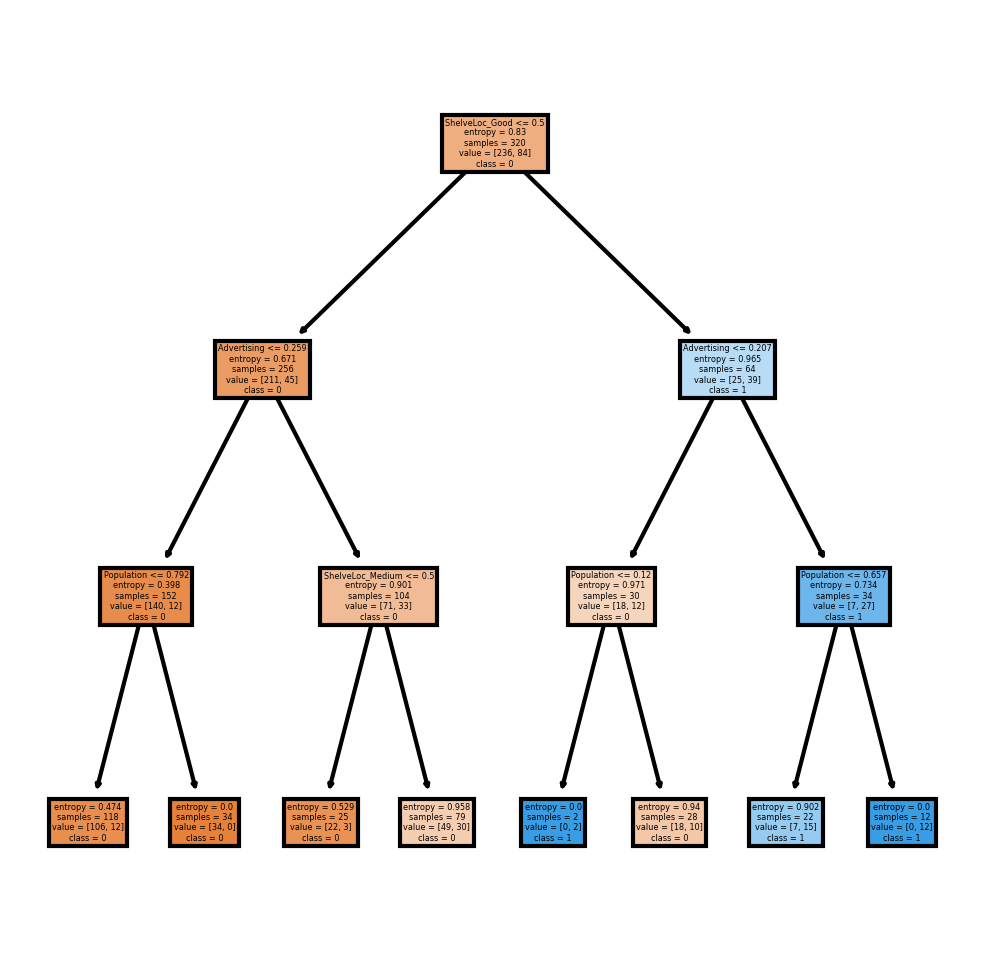

In [30]:
fn=['Advertising','Population','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_YES']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [31]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0.0    66
1.0    14
dtype: int64

In [32]:
preds

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.])

In [33]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0.0,1.0
Sale_Yes,,
0.0,51,2
1.0,15,12


In [34]:
# Accuracy 
np.mean(preds==y_test)

0.7875

Building Decision Tree Classifier (CART) using Gini Criteria

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [36]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7875